# ЛАБОРАТОРНАЯ РАБОТА №9. ПОНИЖЕНИЕ РАЗМЕРНОСТИ. ОТБОР ПРИЗНАКОВ. ИЗВЛЕЧЕНИЕ ПРИЗНАКОВ

ЗАДАНИЕ №1.
1. Для выполнения задания №1 используйте датасеты для задачи классификации и регрессии.
2. С помощью классов библиотеки sklearn выполните понижение размерности (размерность выберите сами, можно разные) с использованием всех описанных методов (VarianceThreshold, SelectKBest, RFE, PCA, tSNE, Isomap).
3. Выберите две модели (одна - для регрессии и другая - для классификации). Обучите выбранные модели с использованием данных в пространстве низкой размерности - используйте результаты выполнения пункта 3 (не забудьте, что понижать нужно и X_train и X_test, но проще всего понижать X).
4. Сформулируйте вывод о том, какие методы понижения размерности лучше всего подходят для Ваших данных.


ЗАДАНИЕ №2**.
1. Самостоятельно реализуйте алгоритм PCA. На основе датасета для задачи классификации выполните понижение размерности до 2 (преобразуйте данные в двумерное пространство). Выполните визуализацию данных (точки на плоскости).
2. Выполнить кластеризацию преобразованных в пункте 1 данных с помощью Вашей реализации алгоритма KMeans из ЛР6.

In [1]:
import pandas as pd
from imblearn.under_sampling import NearMiss
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE, Isomap
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor, Pool
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, accuracy_score
import xgboost as xgb

## Загрузка и разбиение на выборки

In [2]:
data_reg = pd.read_csv("filteredNotes/Lab3.csv")
data_class = pd.read_csv("filteredNotes/Lab4.csv")

In [3]:
X_reg = data_reg.drop(["price", "Unnamed: 0"], axis=1)
y_reg = data_reg["price"]
X_reg.shape

(21399, 13)

In [4]:
scaler = StandardScaler()
X_reg_scaled = scaler.fit_transform(X_reg)
X_reg_scaled = pd.DataFrame(X_reg_scaled, columns=X_reg.columns)

In [5]:
X_class = data_class.drop(["bomb_planted", "Unnamed: 0"], axis=1)
y_class = data_class["bomb_planted"]
X_class.shape

(111988, 14)

In [6]:
scaler = StandardScaler()
X_class_scaled = scaler.fit_transform(X_class)
X_class_scaled = pd.DataFrame(X_class_scaled, columns=X_class.columns)

## Задание №1

### VarianceThreshold

#### Regression

In [7]:
variance_threshold = 1
selection = VarianceThreshold(threshold=variance_threshold)
X_reg_vt=selection.fit_transform(X_reg_scaled)
X_reg_vt.shape

(21399, 4)

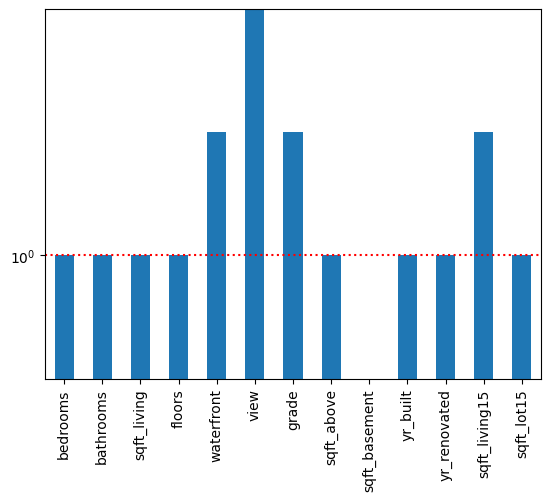

In [8]:
ax = pd.Series(selection.variances_, index=X_reg_scaled.columns).plot(kind='bar', logy=True)
ax.axhline(variance_threshold, ls='dotted', c='r')

#### Classification

In [9]:
variance_threshold = 1
selection = VarianceThreshold(threshold=variance_threshold)
X_class_vt=selection.fit_transform(X_class_scaled)
X_class_vt.shape


(111988, 7)

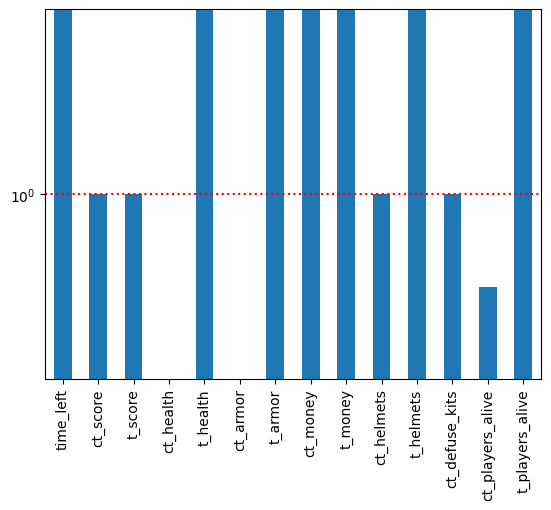

In [10]:
ax = pd.Series(selection.variances_, index=X_class_scaled.columns).plot(kind='bar', logy=True)
ax.axhline(variance_threshold, ls='dotted', c='r')

### SelectKBest

#### Regression

In [11]:
skb = SelectKBest(k=6)
X_reg_skb = skb.fit_transform(X_reg_scaled, y_reg)

In [12]:
X_reg_skb = pd.DataFrame(X_reg_skb, columns=skb.get_feature_names_out())
X_reg_skb

,bathrooms,sqft_living,waterfront,grade,sqft_above,sqft_living15
0,-1.479834,-1.022522,-0.084861,-0.554604,-0.746990,-0.952300
1,0.205225,0.610845,-0.084861,-0.554604,0.511275,-0.426266
2,-1.479834,-1.504307,-0.084861,-1.429887,-1.268090,1.121775
3,1.216260,-0.105956,-0.084861,-0.554604,-0.912217,-0.922241
4,-0.131787,-0.434980,-0.084861,0.320679,-0.111503,-0.260942
...,...,...,...,...,...,...
21394,0.542236,-0.611243,-0.084861,0.320679,-0.302149,-0.666739
21395,0.542236,0.305323,-0.084861,0.320679,0.689211,-0.215853
21396,-1.816846,-1.210536,-0.084861,-0.554604,-0.950346,-1.433244
21397,0.542236,-0.528987,-0.084861,0.320679,-0.213181,-0.847093


#### Classification

In [13]:
skb = SelectKBest(k=6)
X_class_skb = skb.fit_transform(X_class_scaled, y_class)

In [14]:
X_class_skb = pd.DataFrame(X_class_skb, columns=skb.get_feature_names_out())
X_class_skb

,time_left,ct_health,t_health,ct_armor,ct_players_alive,t_players_alive
0,1.541849,0.690483,0.724123,-1.904517,0.624527,0.620018
1,1.182544,0.690483,0.724123,0.469284,0.624527,0.620018
2,0.046101,-0.121512,0.019392,-0.159773,-0.191133,-0.179634
3,-0.332713,-0.121512,0.019392,-0.159773,-0.191133,-0.179634
4,1.541281,0.690483,0.724123,-0.765093,0.624527,0.620018
...,...,...,...,...,...,...
111983,-1.480899,-1.544366,-1.094082,-0.747289,-1.822453,-0.179634
111984,1.540523,0.690483,0.724123,-1.340739,0.624527,0.620018
111985,0.404080,0.690483,0.724123,1.033061,0.624527,0.620018
111986,0.025266,0.690483,0.724123,1.033061,0.624527,0.620018


### RFE

#### Regression

In [15]:
tree = DecisionTreeRegressor().fit(X_reg_scaled, y_reg)

In [16]:
rfe = RFE(estimator=tree, n_features_to_select=4, step=1).fit(X_reg_scaled, y_reg)
X_reg_rfe = pd.DataFrame(rfe.transform(X_reg_scaled), columns=rfe.get_feature_names_out())
X_reg_rfe

,sqft_living,grade,yr_built,sqft_living15
0,-1.022522,-0.554604,-0.541068,-0.952300
1,0.610845,-0.554604,-0.677278,-0.426266
2,-1.504307,-1.429887,-1.290224,1.121775
3,-0.105956,-0.554604,-0.200542,-0.922241
4,-0.434980,0.320679,0.548614,-0.260942
...,...,...,...,...
21394,-0.611243,0.320679,1.297770,-0.666739
21395,0.305323,0.320679,1.468033,-0.215853
21396,-1.210536,-0.554604,1.297770,-1.433244
21397,-0.528987,0.320679,1.127508,-0.847093


#### Classification

In [17]:
tree = DecisionTreeClassifier().fit(X_class_scaled, y_class)

In [18]:
rfe = RFE(estimator=tree, n_features_to_select=4, step=1).fit(X_class_scaled, y_class)
X_class_rfe = pd.DataFrame(rfe.transform(X_class_scaled), columns=rfe.get_feature_names_out())
X_class_rfe

,time_left,t_health,ct_armor,t_money
0,1.541849,0.724123,-1.904517,-0.619492
1,1.182544,0.724123,0.469284,-0.894910
2,0.046101,0.019392,-0.159773,-0.907242
3,-0.332713,0.019392,-0.159773,-0.907242
4,1.541281,0.724123,-0.765093,-0.064548
...,...,...,...,...
111983,-1.480899,-1.094082,-0.747289,-0.459175
111984,1.540523,0.724123,-1.340739,1.016567
111985,0.404080,0.724123,1.033061,-0.397514
111986,0.025266,0.724123,1.033061,-0.397514


### PCA

#### Regression

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=2)
X_reg_pca = pca.fit_transform(X_reg_scaled, y_reg)
X_reg_pca.shape

(21399, 2)

In [21]:
X_reg_pca

array([[-2.43263813, -0.24845134],
       [ 0.14476654,  1.03674147],
       [-2.90161582,  0.0743363 ],
       ...,
       [-2.27334674, -1.93297854],
       [ 0.0162551 , -1.65476317],
       [-2.28445862, -1.92088809]])

In [22]:
sum(pca.explained_variance_ratio_)

0.5180015581850408

#### Classifiction

In [23]:
pca = PCA(n_components=2)
X_class_pca = pca.fit_transform(X_class_scaled, y_class)
X_class_pca.shape

(111988, 2)

In [24]:
X_class_pca

array([[ 0.03846283,  3.29470893],
       [-0.64413032,  1.31564088],
       [ 1.23684126,  1.07610789],
       ...,
       [-1.65755521, -0.96486108],
       [-1.53601191, -1.09267534],
       [-0.38671557, -0.76804259]])

In [25]:
sum(pca.explained_variance_ratio_)

0.5089126036808806

### TSNE

#### Regression

In [26]:
tsne = TSNE(n_components=2)
X_reg_tsne = tsne.fit_transform(X_reg_scaled)

In [27]:
X_reg_tsne

array([[ -62.743988 ,  -54.859226 ],
       [  12.0021105,   94.781456 ],
       [-100.82461  ,    4.7403817],
       ...,
       [ -35.721687 ,  -65.87551  ],
       [  12.600287 ,  -56.261948 ],
       [ -35.715015 ,  -65.88311  ]], dtype=float32)

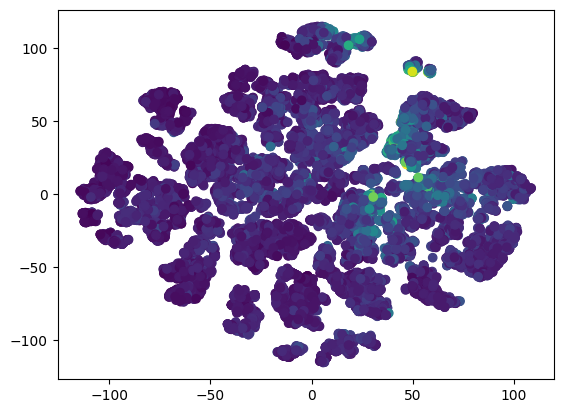

In [28]:
plt.scatter(X_reg_tsne[:, 0], X_reg_tsne[:, 1], c=y_reg)

#### Classification

In [29]:
tsne = TSNE(n_components=2)
X_class_tsne = tsne.fit_transform(X_class_scaled)

In [30]:
X_class_tsne

array([[ 33.91129  ,  78.32892  ],
       [ 44.637455 ,  95.107376 ],
       [109.15529  ,  57.87287  ],
       ...,
       [-35.627083 , -17.27656  ],
       [-35.566593 , -17.289347 ],
       [ -2.6509864,   1.7141603]], dtype=float32)

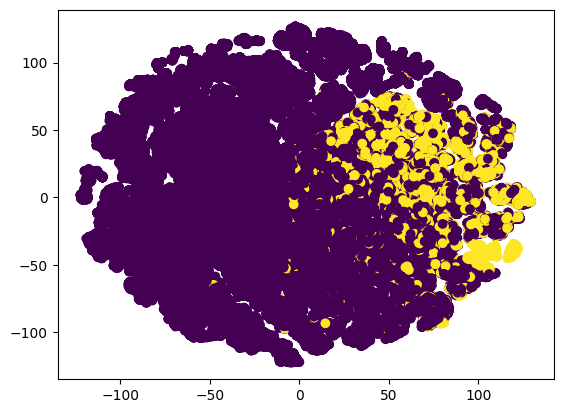

In [31]:
plt.scatter(X_class_tsne[:, 0], X_class_tsne[:, 1], c=y_class)

### Isomap

#### Regression

In [32]:
isomap = Isomap(n_components=2)
X_reg_isomap = isomap.fit_transform(X_reg_scaled)

c:\Users\vlszg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\vlszg\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\vlszg\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\vlszg\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr

In [33]:
X_reg_isomap

array([[-4.74474379, -7.29694413],
       [35.95254877, -9.18875544],
       [-5.14850789, -6.84290253],
       ...,
       [-2.43655691,  7.16815148],
       [ 1.50063243,  9.1602086 ],
       [-2.44454162,  7.17277197]])

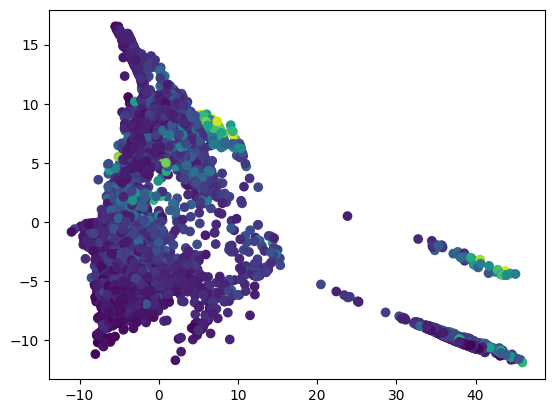

In [34]:
plt.scatter(X_reg_isomap[:,0], X_reg_isomap[:,1], c=y_reg)

#### Classification

Машина не вывозит(((
на 50 тыс грузило 50 минут и выкидывает ошибку

In [35]:
isomap = Isomap(n_components=2)
X_class_isomap = isomap.fit_transform(X_class_scaled.head(20000))

c:\Users\vlszg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\vlszg\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\vlszg\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\vlszg\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr

In [36]:
X_class_isomap

array([[14.30578052,  3.70309309],
       [13.51439096,  3.56176344],
       [11.37965938,  1.46630585],
       ...,
       [-5.99892287,  4.55591519],
       [-1.66438885,  5.86285884],
       [-1.4589849 ,  5.66719584]])

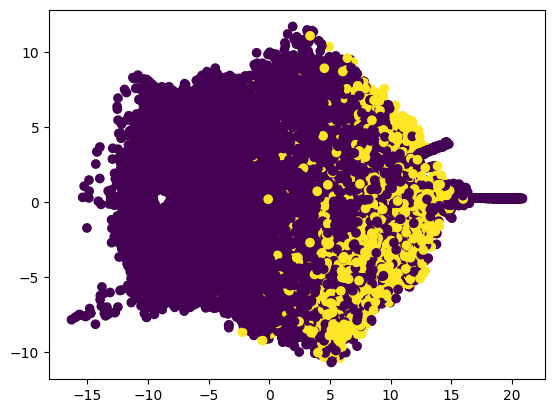

In [37]:
plt.scatter(X_class_isomap[:,0], X_class_isomap[:,1], c=y_class.head(20000))

## Выбор лучшего метода понижения размерности для моих данных

In [38]:
sampleClassification = {
    "VarianceThreshold": X_class_vt,
    "SelectKBest": X_class_skb,
    "RFE": X_class_rfe,
    "PCA": X_class_pca,
    "TSNE": X_class_tsne,
    "Isomap": X_class_isomap,
}

In [39]:
sampleRegression = {
    "VarianceThreshold": X_reg_vt,
    "SelectKBest": X_reg_skb,
    "RFE": X_reg_rfe,
    "PCA": X_reg_pca,
    "TSNE": X_reg_tsne,
    "Isomap": X_reg_isomap,
}

Моделью для регресси я выбрал CatboostRegressor, для классификации Light Gradient Boosting Machine

In [40]:
class ChooseBestSampleForRegressionNClassification:
    def __init__(self, sampleClassification, sampleRegression, y_class, y_reg):
        self.sampleClassification = sampleClassification
        self.sampleRegression = sampleRegression
        self.y_class = y_class
        self.y_reg = y_reg

    def BestSampleRegression(self):
        metricSamples = {}
        for i in self.sampleRegression:
            X_train, X_test, y_train, y_test = train_test_split(
                self.sampleRegression[i], self.y_reg, test_size=0.2, random_state=15
            )

            train_data = Pool(data=X_train, label=y_train)

            test_data = Pool(data=X_test, label=y_test)

            model = CatBoostRegressor()
            model.fit(train_data, plot=True)

            y_pred = model.predict(test_data)

            metricSamples[i] = r2_score(y_test, y_pred)

        sortedMetricSamples = sorted(
            metricSamples.items(), key=lambda item: item[1], reverse=True
        )
        print(
            f"Лучший результат показал {sortedMetricSamples[0][0]} при значении r2_score = {(sortedMetricSamples[0][1])}"
        )

    def BestSampleClassification(self):
        metricSamples = dict()
        for i in self.sampleClassification:
            if i == "Isomap":
                y = self.y_class.head(20000)
            else:
                y = self.y_class

            X_train, X_test, y_train, y_test = train_test_split(
                self.sampleClassification[i], y, test_size=0.2, random_state=15
            )

            nm = NearMiss()
            X_train, y_train = nm.fit_resample(X_train, y_train.ravel())

            model = xgb.XGBClassifier(random_state=17)

            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)

            metricSamples[i] = accuracy_score(y_test, y_pred)

        sortedMetricSamples = sorted(
            metricSamples.items(), key=lambda item: item[1], reverse=True
        )
        print(
            f"Лучший результат показал {sortedMetricSamples[0][0]} при значении accuracy_score = {(sortedMetricSamples[0][1])}"
        )

In [41]:
c = ChooseBestSampleForRegressionNClassification(
    sampleClassification, sampleRegression, y_class, y_reg
)

In [42]:
c.BestSampleClassification()

Лучший результат показал RFE при значении accuracy_score = 0.9808911509956246


In [43]:
c.BestSampleRegression()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.064131
0:	learn: 320202.3348318	total: 160ms	remaining: 2m 39s
1:	learn: 310411.1541442	total: 165ms	remaining: 1m 22s
2:	learn: 301453.1375107	total: 169ms	remaining: 56.1s
3:	learn: 293103.2233044	total: 173ms	remaining: 43s
4:	learn: 285919.3675790	total: 177ms	remaining: 35.2s
5:	learn: 279143.7088763	total: 181ms	remaining: 30s
6:	learn: 272979.6338481	total: 185ms	remaining: 26.3s
7:	learn: 267444.5986634	total: 189ms	remaining: 23.4s
8:	learn: 262396.9503997	total: 193ms	remaining: 21.3s
9:	learn: 257861.0471924	total: 198ms	remaining: 19.6s
10:	learn: 253725.5771506	total: 202ms	remaining: 18.2s
11:	learn: 250024.7298714	total: 206ms	remaining: 16.9s
12:	learn: 246633.9227894	total: 211ms	remaining: 16s
13:	learn: 243529.1880096	total: 214ms	remaining: 15.1s
14:	learn: 240770.3262756	total: 219ms	remaining: 14.4s
15:	learn: 238343.6530514	total: 222ms	remaining: 13.7s
16:	learn: 236056.6241226	total: 227ms	remaining: 13.1s
17:	learn: 233959.2456154	total:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.064131
0:	learn: 320113.7566502	total: 6.28ms	remaining: 6.27s
1:	learn: 310234.5016111	total: 10.4ms	remaining: 5.17s
2:	learn: 301136.3721830	total: 14.2ms	remaining: 4.72s
3:	learn: 292670.1507546	total: 19.8ms	remaining: 4.93s
4:	learn: 284923.9789004	total: 23.8ms	remaining: 4.73s
5:	learn: 277936.9704229	total: 27.4ms	remaining: 4.54s
6:	learn: 271581.5102817	total: 31.2ms	remaining: 4.43s
7:	learn: 265612.9848281	total: 35.3ms	remaining: 4.38s
8:	learn: 260147.2581713	total: 39.1ms	remaining: 4.31s
9:	learn: 255549.3611648	total: 42.9ms	remaining: 4.24s
10:	learn: 250969.7386720	total: 46.6ms	remaining: 4.19s
11:	learn: 247152.0068421	total: 50.2ms	remaining: 4.14s
12:	learn: 243374.4801152	total: 54.2ms	remaining: 4.11s
13:	learn: 239883.1944787	total: 57.8ms	remaining: 4.07s
14:	learn: 236849.4092713	total: 61.5ms	remaining: 4.04s
15:	learn: 234054.0497544	total: 65.1ms	remaining: 4.01s
16:	learn: 231443.6657780	total: 69.2ms	remaining: 4s
17:	learn: 229

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.064131
0:	learn: 319660.6026619	total: 9.07ms	remaining: 9.06s
1:	learn: 309073.0602156	total: 15.1ms	remaining: 7.53s
2:	learn: 299245.0203659	total: 19ms	remaining: 6.32s
3:	learn: 290040.1962400	total: 23.9ms	remaining: 5.95s
4:	learn: 282096.4146617	total: 27.8ms	remaining: 5.54s
5:	learn: 274353.0000848	total: 31.5ms	remaining: 5.22s
6:	learn: 267112.9139269	total: 35.4ms	remaining: 5.03s
7:	learn: 260515.4559951	total: 39.2ms	remaining: 4.87s
8:	learn: 254730.4706611	total: 42.7ms	remaining: 4.7s
9:	learn: 249261.1345085	total: 46.3ms	remaining: 4.59s
10:	learn: 244273.6107735	total: 50.1ms	remaining: 4.5s
11:	learn: 239553.1715777	total: 56ms	remaining: 4.61s
12:	learn: 235475.1920866	total: 59.6ms	remaining: 4.52s
13:	learn: 231569.6119778	total: 63.5ms	remaining: 4.47s
14:	learn: 227963.9681150	total: 67.6ms	remaining: 4.44s
15:	learn: 224652.8348887	total: 71.9ms	remaining: 4.42s
16:	learn: 221586.9917496	total: 75.8ms	remaining: 4.38s
17:	learn: 218798

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.064131
0:	learn: 320352.2765349	total: 9.65ms	remaining: 9.64s
1:	learn: 310547.0271811	total: 16.3ms	remaining: 8.14s
2:	learn: 301700.4680526	total: 22.3ms	remaining: 7.4s
3:	learn: 293534.7884873	total: 27.1ms	remaining: 6.75s
4:	learn: 285837.7073503	total: 32.4ms	remaining: 6.44s
5:	learn: 279000.3555485	total: 38.3ms	remaining: 6.34s
6:	learn: 272943.0623331	total: 42.8ms	remaining: 6.07s
7:	learn: 267239.2171950	total: 46.7ms	remaining: 5.79s
8:	learn: 261932.6524426	total: 50.9ms	remaining: 5.6s
9:	learn: 257155.0869211	total: 54.8ms	remaining: 5.43s
10:	learn: 252740.1311427	total: 58.5ms	remaining: 5.26s
11:	learn: 248947.1153286	total: 62.2ms	remaining: 5.12s
12:	learn: 245452.3338749	total: 66ms	remaining: 5.01s
13:	learn: 242228.7323487	total: 69.9ms	remaining: 4.92s
14:	learn: 239555.8865479	total: 73.8ms	remaining: 4.85s
15:	learn: 236982.2616760	total: 77.6ms	remaining: 4.77s
16:	learn: 234709.8821250	total: 81.2ms	remaining: 4.69s
17:	learn: 2325

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.064131
0:	learn: 323953.9930618	total: 6.74ms	remaining: 6.74s
1:	learn: 317339.8626952	total: 12.2ms	remaining: 6.1s
2:	learn: 311823.1285385	total: 17ms	remaining: 5.65s
3:	learn: 306539.8122342	total: 20.7ms	remaining: 5.17s
4:	learn: 301595.1069175	total: 24.3ms	remaining: 4.83s
5:	learn: 296857.1723833	total: 28.3ms	remaining: 4.68s
6:	learn: 292478.4724832	total: 32.7ms	remaining: 4.64s
7:	learn: 288442.4339106	total: 36.5ms	remaining: 4.53s
8:	learn: 284999.4300712	total: 40.2ms	remaining: 4.42s
9:	learn: 281811.6690263	total: 43.8ms	remaining: 4.34s
10:	learn: 278918.7949841	total: 48.4ms	remaining: 4.35s
11:	learn: 275854.9796781	total: 51.9ms	remaining: 4.27s
12:	learn: 272862.5814866	total: 55.3ms	remaining: 4.2s
13:	learn: 270724.3272275	total: 59.3ms	remaining: 4.18s
14:	learn: 268875.4525960	total: 63.1ms	remaining: 4.14s
15:	learn: 266791.4861785	total: 66.8ms	remaining: 4.11s
16:	learn: 265002.5967381	total: 70.2ms	remaining: 4.06s
17:	learn: 2633

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.064131
0:	learn: 326246.6688006	total: 5.89ms	remaining: 5.88s
1:	learn: 321760.6717062	total: 9.99ms	remaining: 4.98s
2:	learn: 318360.6998604	total: 13.9ms	remaining: 4.62s
3:	learn: 314362.5652226	total: 17.8ms	remaining: 4.43s
4:	learn: 310799.5100301	total: 22.5ms	remaining: 4.48s
5:	learn: 307749.6839269	total: 26.3ms	remaining: 4.36s
6:	learn: 304842.0332052	total: 30.5ms	remaining: 4.33s
7:	learn: 302312.2937789	total: 35ms	remaining: 4.33s
8:	learn: 299960.5256508	total: 39.2ms	remaining: 4.32s
9:	learn: 298019.5976780	total: 43ms	remaining: 4.25s
10:	learn: 296451.2579065	total: 46.3ms	remaining: 4.17s
11:	learn: 294636.8087521	total: 52.2ms	remaining: 4.3s
12:	learn: 293100.3573965	total: 56.1ms	remaining: 4.26s
13:	learn: 291780.6753732	total: 59.7ms	remaining: 4.21s
14:	learn: 290422.8734858	total: 63.4ms	remaining: 4.16s
15:	learn: 289228.1146844	total: 66.8ms	remaining: 4.11s
16:	learn: 288132.0310750	total: 70.8ms	remaining: 4.09s
17:	learn: 28724